 **Name: Pranavdeep Singh (21119036) and Himani Panwar (21114041)**

**Topic: Optimising Edge Server Positioning for CDNs using Density Estimation**

#IMPORTS

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.mixture

#READING AND CLEANING THE DATA

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Network Project/world-population-by-country-2020.csv")

In [ ]:
df_coor = pd.read_csv("/content/drive/MyDrive/Network Project/country-coordinates-world.csv")

In [ ]:
df.head()

,no,Country (or dependency),Population 2020,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,China,"1,439,323,776",0.39%,"5,540,090",153,"9,388,211","-348,399",1.7,38,61%,18.47%
1,2,India,"1,380,004,385",0.99%,"13,586,631",464,"2,973,190","-532,687",2.2,28,35%,17.70%
2,3,United States,"331,002,651",0.59%,"1,937,734",36,"9,147,420","954,806",1.8,38,83%,4.25%
3,4,Indonesia,"273,523,615",1.07%,"2,898,047",151,"1,811,570","-98,955",2.3,30,56%,3.51%
4,5,Pakistan,"220,892,340",2.00%,"4,327,022",287,"770,880","-233,379",3.6,23,35%,2.83%


In [ ]:
df_coor.head()

,latitude,longitude,Country
0,33.939110,67.709953,Afghanistan
1,41.153332,20.168331,Albania
2,28.033886,1.659626,Algeria
3,-14.270972,-170.132217,American Samoa
4,42.546245,1.601554,Andorra


In [ ]:
def parse_string(s):
  s1 = ""
  for c in s:
    if(c.isdigit()):
      s1 = s1 + c
  return (int)(s1)

In [ ]:
l = []
for i in range(len(df)):
  for j in range(len(df_coor)):
    if(df['Country (or dependency)'].iloc[i] == df_coor['Country'].iloc[j]):
      l.append([df_coor['Country'].iloc[j], parse_string(df['Population 2020'].iloc[i]), df_coor['latitude'].iloc[j], df_coor['longitude'].iloc[j]])
print(len(l))

sum = 0
for i in range(len(df_coor)):
  flag = 0
  for entry in l:
    if(df_coor['Country'].iloc[i] == entry[0]):
      flag = 1
      break
  if(flag==0):
    sum += (entry[1])
print(sum)

208
48852


In [ ]:
total = 0
for i in range(len(l)):
  l[i][1] = l[i][1]/1000000
  total += l[i][1]
print(total)

7282.235494000001


In [ ]:
coordinates_weighted = []
for i in range(len(l)):
  for j in range((int)(l[i][1])):
    coordinates_weighted.append([l[i][2],l[i][3]])

In [ ]:
X = np.array(coordinates_weighted)

In [ ]:
def l2dist(l1,l2):
  dist = 0.0
  dist = (l1[0]-l2[0])**2
  dist += (l1[1]-l2[1])**2
  return dist

#TRAINING THE MODEL AND VISUALISING RESULTS

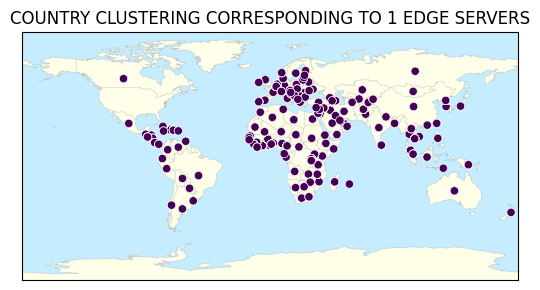

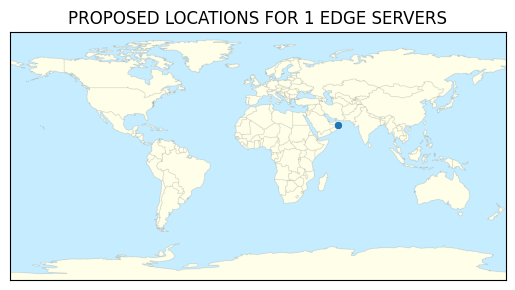

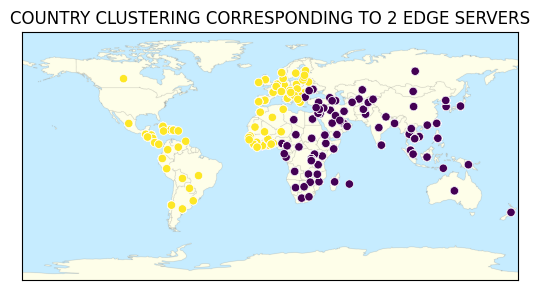

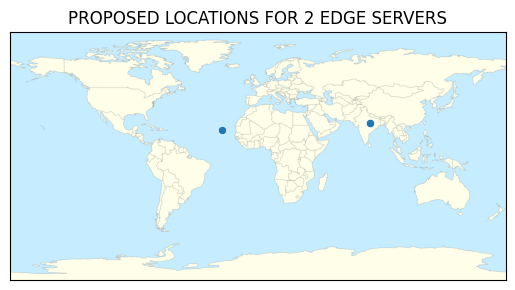

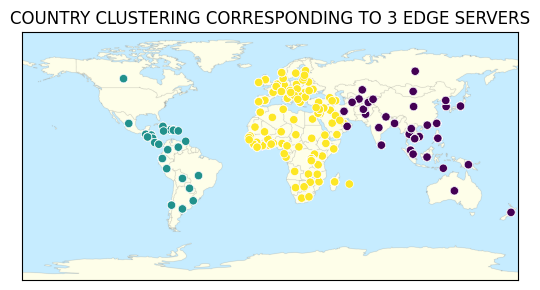

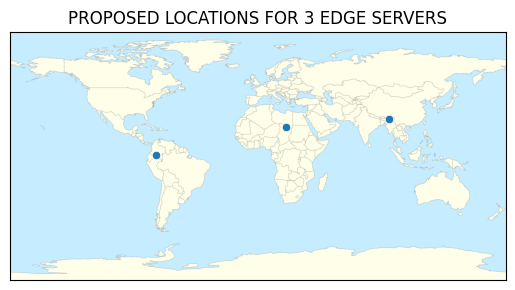

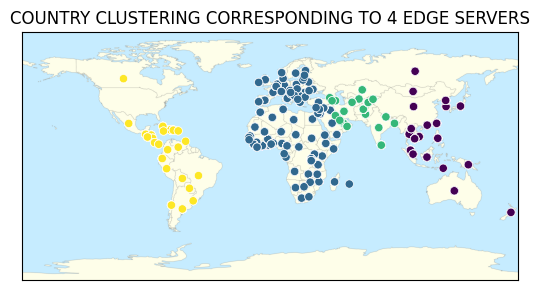

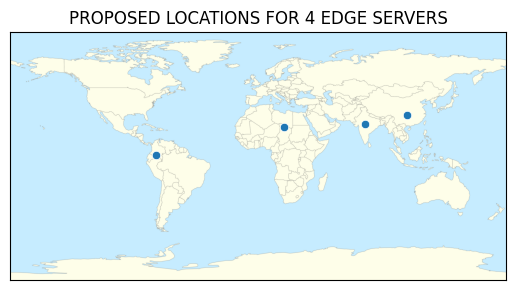

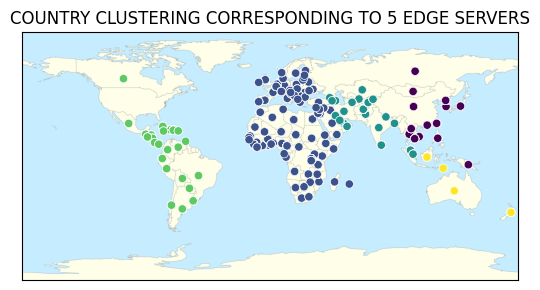

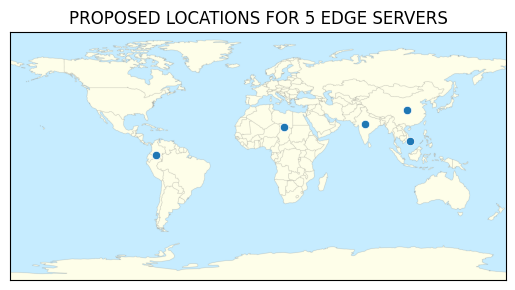

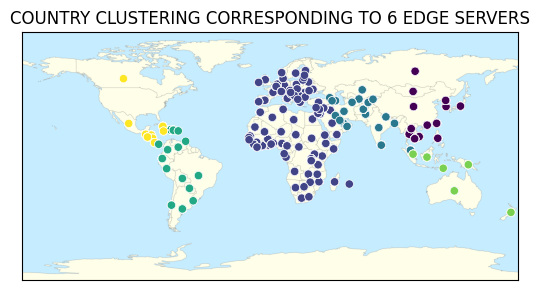

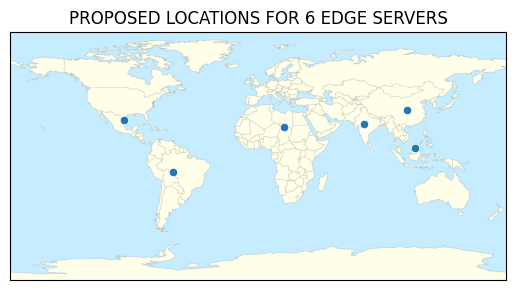

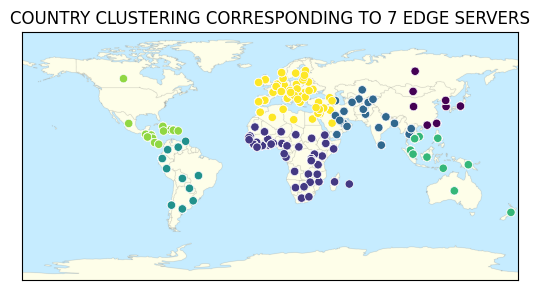

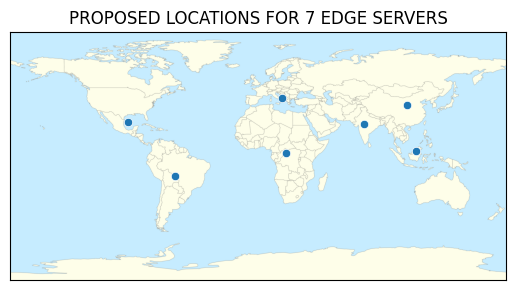

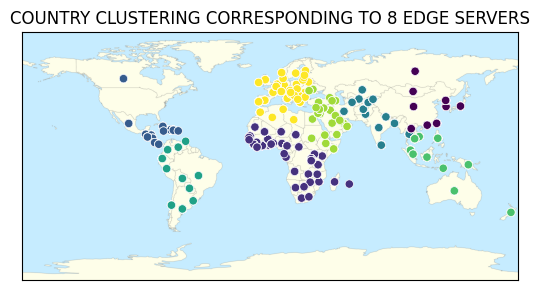

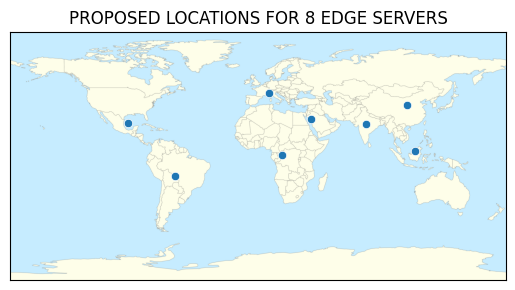

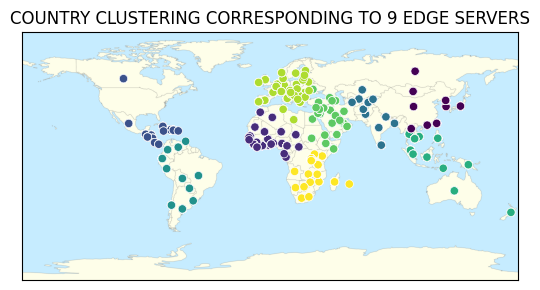

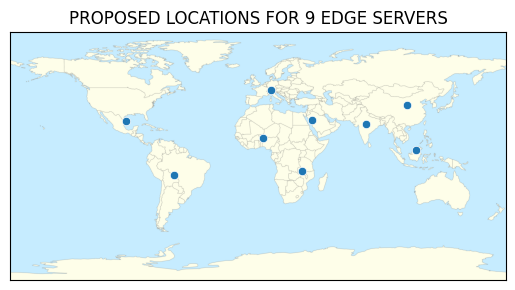

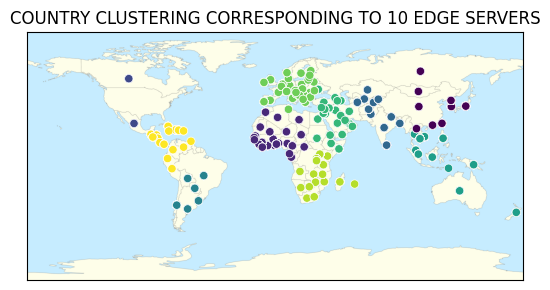

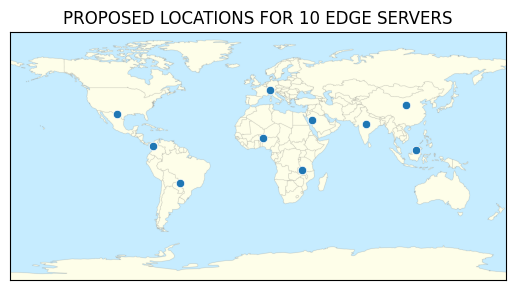

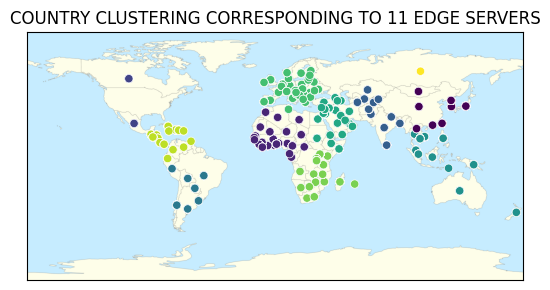

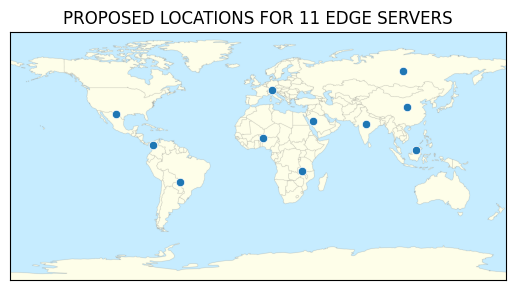

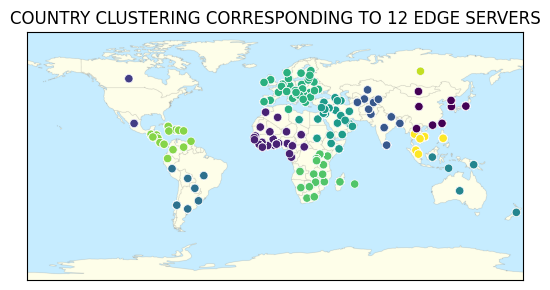

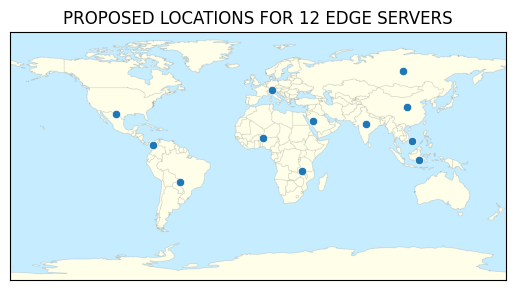

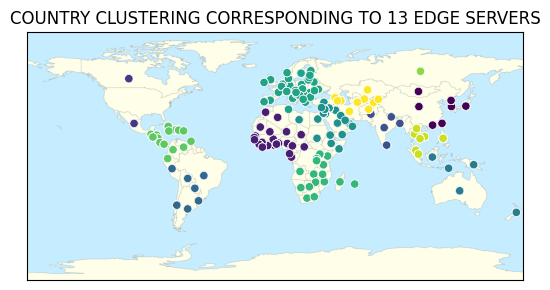

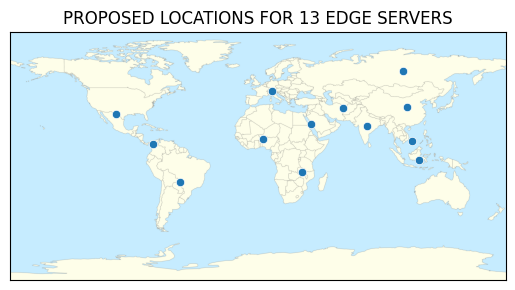

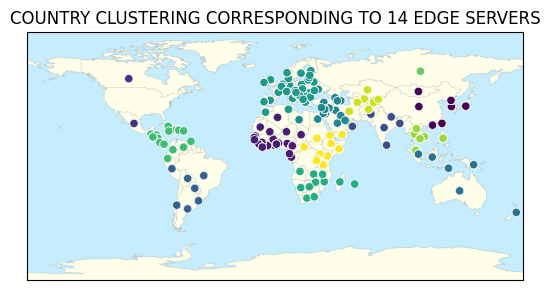

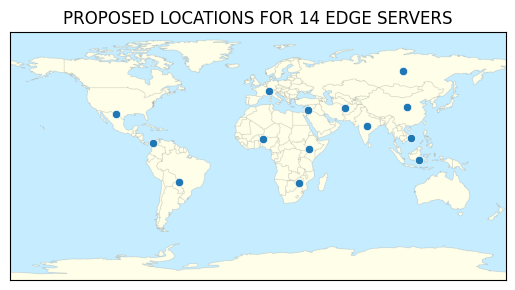

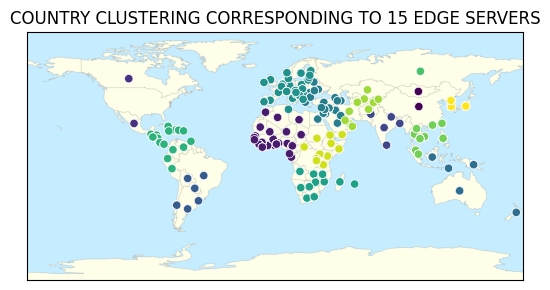

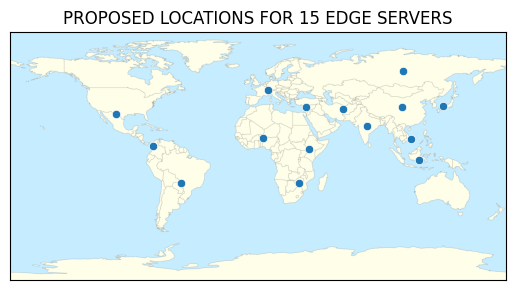

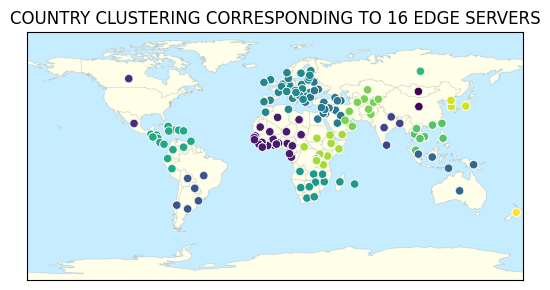

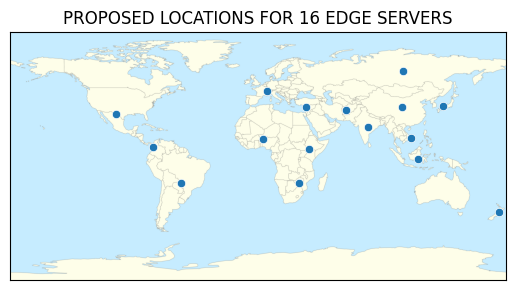

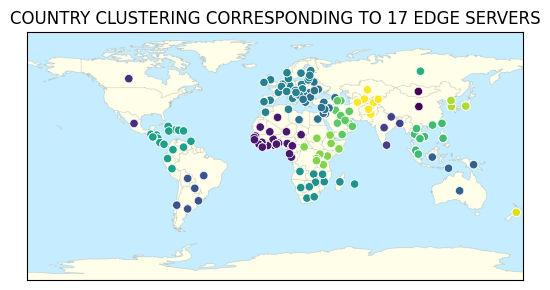

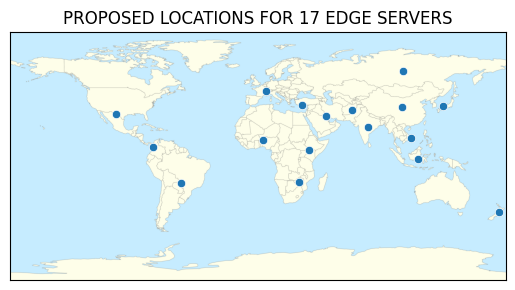

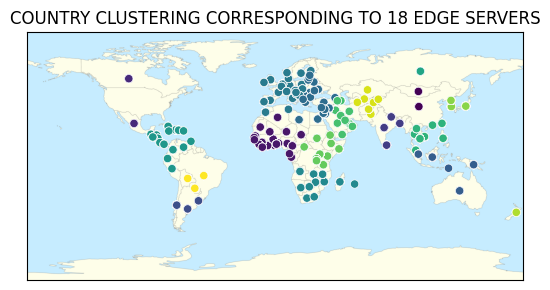

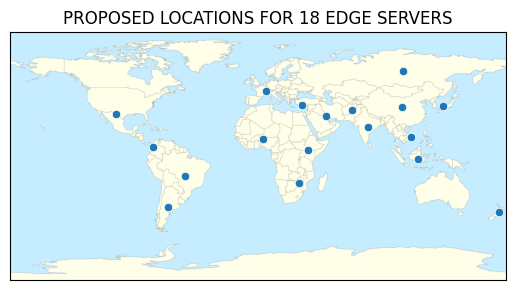

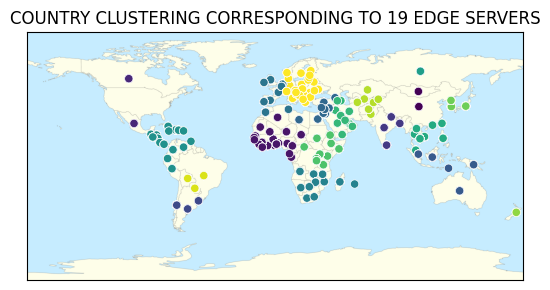

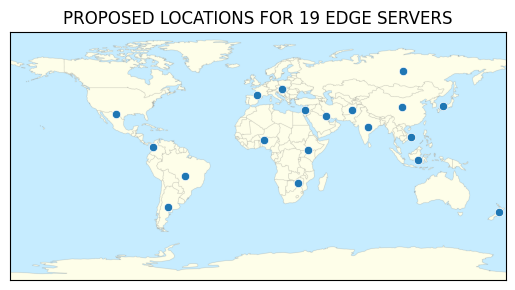

In [ ]:
avg_rtt = []
for num_servers in range(1,20):
  gm = sklearn.mixture.GaussianMixture(n_components = num_servers, covariance_type='tied', random_state=42)
  gm.fit(X)
  labels = gm.predict(X)
  longi = []
  lati = []
  for i in X:
    lati.append(i[0])
    longi.append(i[1])
  img = plt.imread("/content/drive/MyDrive/Network Project/World_location_map.png")
  fig, ax = plt.subplots()
  ax.imshow(img, extent=[-180, 180, -90, 90])
  sns.scatterplot(x=longi, y=lati, c=labels, cmap='viridis')
  plt.xticks([])
  plt.yticks([])
  plt.title('COUNTRY CLUSTERING CORRESPONDING TO '+str(num_servers)+' EDGE SERVERS')
  plt.show()
  centres = gm.means_
  c_longitudes = []
  c_latitudes = []
  for i in centres:
    c_latitudes.append(i[0])
    c_longitudes.append(i[1])
  img = plt.imread("/content/drive/MyDrive/Network Project/World_location_map.png")
  fig, ax = plt.subplots()
  ax.imshow(img, extent=[-180, 180, -90, 90])
  sns.scatterplot(x = c_longitudes, y = c_latitudes)
  plt.xticks([])
  plt.yticks([])
  plt.title('PROPOSED LOCATIONS FOR '+str(num_servers)+' EDGE SERVERS')
  plt.show()
  labels = gm.predict(coordinates_weighted)
  dist = 0
  for i in range(len(coordinates_weighted)):
    dist = dist + l2dist(coordinates_weighted[i], centres[labels[i]])
  avg_rtt.append(dist*(1e-7))

In [ ]:
gm.covariances_

array([[25.54311371, -1.32290333],
       [-1.32290333, 24.38262882]])

([<matplotlib.axis.YTick at 0x7b0bb1d17c40>,
 [Text(0, 0.5, '0.5'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.5, '1.5'),
  Text(0, 2.0, '2.0'),
  Text(0, 2.5, '2.5')])

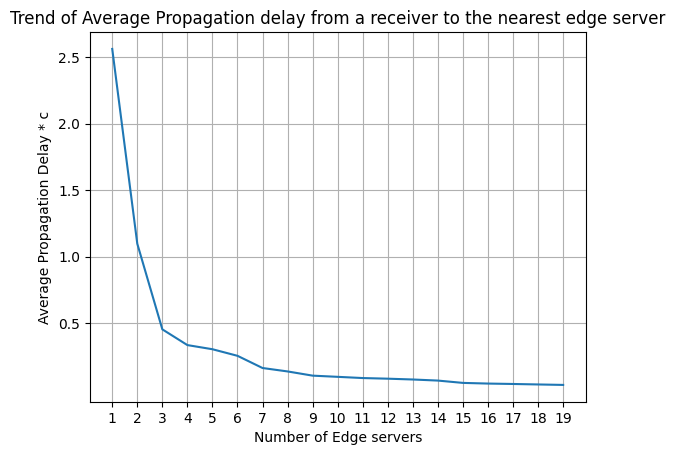

In [ ]:
plt.plot((1+np.arange(len(avg_rtt))),avg_rtt)
plt.grid()
plt.title('Trend of Average Propagation delay from a receiver to the nearest edge server')
plt.xlabel('Number of Edge servers')
plt.ylabel('Average Propagation Delay * c')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
plt.yticks([0.5,1.0,1.5,2.0,2.5])